# Preparing Dataset
## Importing Libraries
### Iris dataset contains 4-features (i.e. Sepal length, Sepal width, Petal length, Petal Width) of flowers of 3 - species (i.e. Setosa, Versicolor, Virginica)

In [1]:
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Importing IRIS Dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Encoding Class Labels using sklearn's labe encoder

In [3]:
y_prev = copy.copy(y)

le = LabelEncoder()
le_y = le.fit(y) 
y = le_y.transform(y) + 1

y_prev_vs_y_encoded = np.hstack((y_prev.reshape(len(y_prev),1), y.reshape(len(y),1)))
print(y_prev_vs_y_encoded)

[['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-setosa' 1]
 ['Iris-versicolor' 2]
 ['Iris-versicolor' 2]
 ['I

## Creating Feature and Class Label Dictonaries

In [4]:
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('Sepal length',
                  'Sepal width',
                  'Petal length',
                  'Petal width', ))}

## Visualizing Dataset using histogram

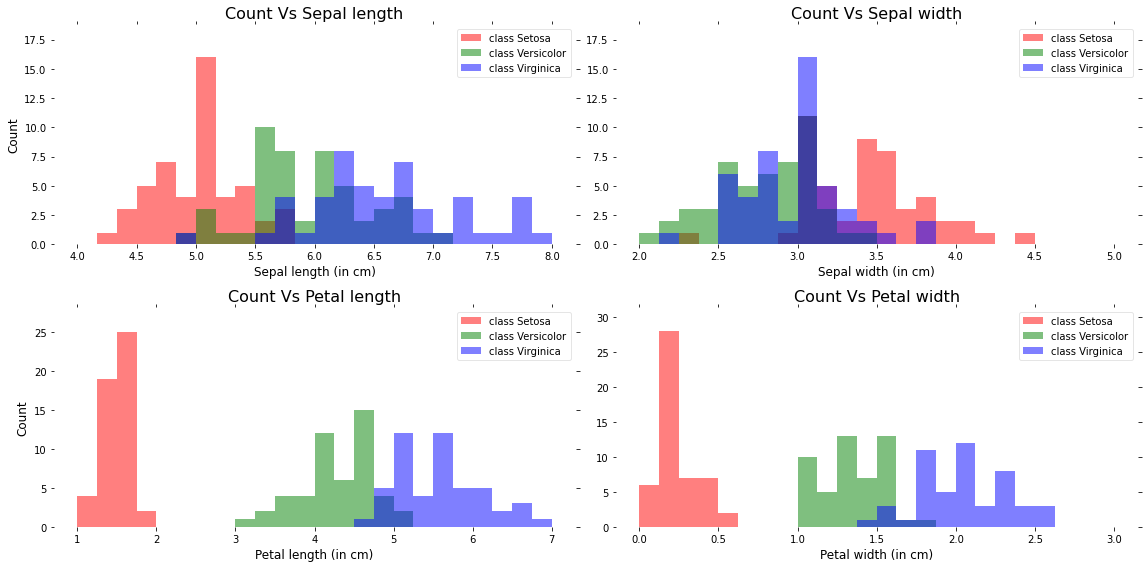

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('red', 'green', 'blue')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label=f'class {label_dict[lab]}',
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=10)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt]+' (in cm)', fontsize=12)
    ax.set_title(f'Count Vs {feature_dict[cnt]}', fontsize=16)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('Count', fontsize=12)
axes[1][0].set_ylabel('Count', fontsize=12)

fig.tight_layout()       

plt.show()

# Peforming Linear Discriminant Analysis
# Step 1: Computing the d-dimensional mean vectors


In [6]:
np.set_printoptions(precision = 4)

mean_vectors = []
for col in range(1,4):
    mean_vectors.append(np.mean(X[y==col], axis=0))
    print(f'Mean Vector class {col}: {mean_vectors[col-1]}\n')

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



# Step 2: Computing the Scatter Matrices
## 2.1 Within-class scatter matrix S_W

In [7]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('Within-class Scatter Matrix:\n', S_W)

Within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


## 2.2 Between-class scatter matrix S_B

In [8]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


# Step 3: Solving the generalized eigenvalue problem for the matrix (S_W^-1)*(S_B)

In [9]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.2049]
 [ 0.3871]
 [-0.5465]
 [-0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.8379]
 [ 0.1696]
 [ 0.1229]
 [ 0.5041]]
Eigenvalue 3: -4.13e-15

Eigenvector 4: 
[[ 0.2   ]
 [-0.3949]
 [-0.4567]
 [ 0.7717]]
Eigenvalue 4: 1.20e-14


## Checking Eigen Value and Eigen Vector Calculations

In [10]:
for i in range(len(eig_vals)):
    eigvec = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigvec),
                                         eig_vals[i] * eigvec,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


# Step 4: Selecting linear discriminants for the new feature subspace
## 4.1. Sorting the eigenvectors by decreasing eigenvalues


In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972981
0.27756686384004264
1.1953730364935478e-14
4.1311796919088535e-15


In [12]:
print('Variance Cotained by Eigen Values (in percentage):\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance Cotained by Eigen Values (in percentage):

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


## 4.2. Choosing k eigenvectors with the largest eigenvalues

In [13]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.2049 -0.009 ]
 [ 0.3871 -0.589 ]
 [-0.5465  0.2543]
 [-0.7138 -0.767 ]]


# Step 5: Transforming the samples onto the new subspace

In [14]:
X_lda = X.dot(W)

In [15]:

def lda_plot():
    plt.rcParams['figure.figsize'] = [18,9]
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('red', 'green', 'blue')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1', fontsize=14)
    plt.ylabel('LD2', fontsize=14)

    leg = plt.legend(loc='upper right', fancybox=True, fontsize=14)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA on IRIS Dataset (projection onto the first 2 LDs)', fontsize=18)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()


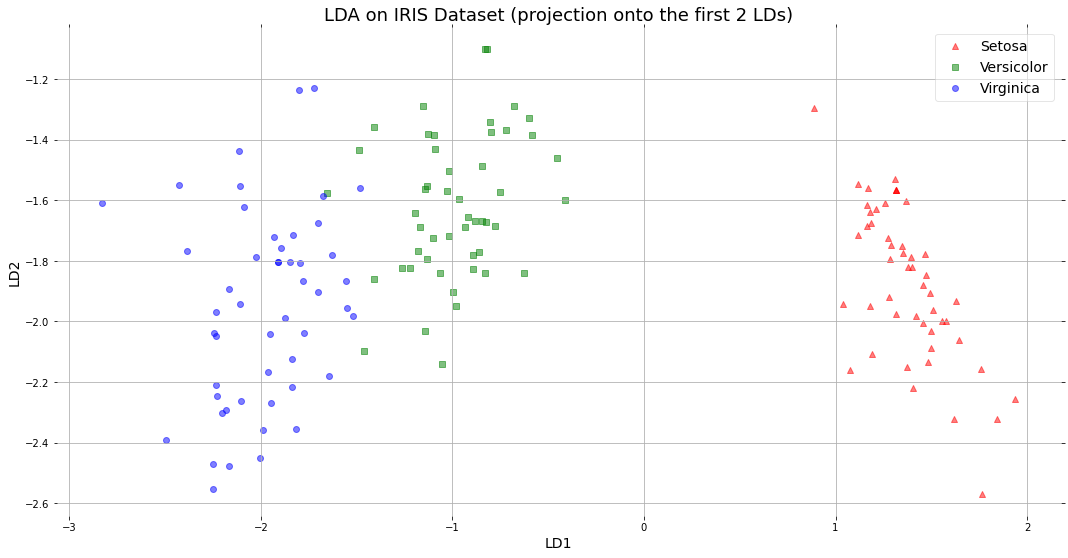

In [16]:
lda_plot()